Completion time 20858


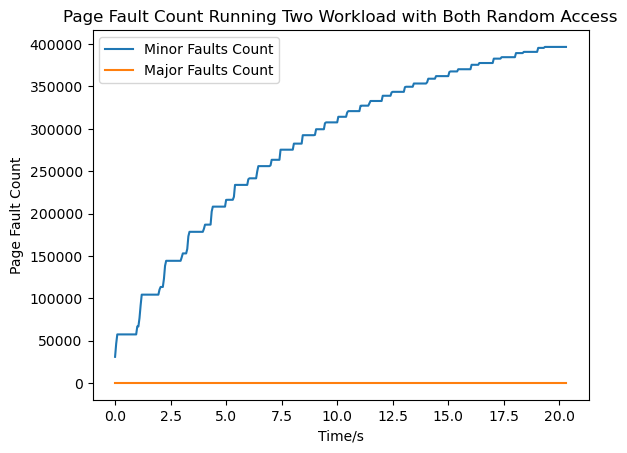

In [4]:
import matplotlib.pyplot as plt

major_faults = []
minor_faults = []
sum_maj = 0
sum_min = 0

with open("./profile1.data") as f:
    jiffies = []
    for line in f.readlines():
        try:
            s = [int(x) for x in line.strip().split(" ")]
        except:
            break
        if s[0] == 0:
            break
        sum_maj += s[2]
        sum_min += s[1]
        jiffies.append(s[0])
        major_faults.append(sum_maj)
        minor_faults.append(sum_min)
    print("Completion time", jiffies[-1] - jiffies[0])

# Plotting Page Fault Counts
plt.figure()
plt.plot([x * 0.05 for x in range(len(minor_faults))], minor_faults, label="Minor Faults Count")
plt.plot([x * 0.05 for x in range(len(major_faults))], major_faults, label="Major Faults Count")
plt.title('Page Fault Count Running Two Workload with Both Random Access')
plt.xlabel('Time/s')
plt.ylabel('Page Fault Count')
plt.legend()
plt.show()


Completion time 20182


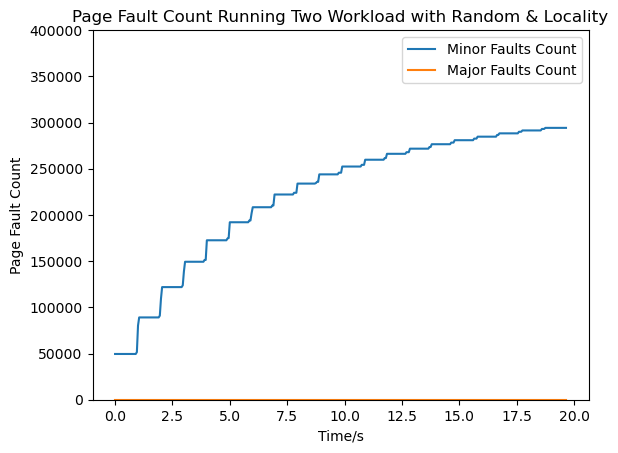

In [6]:
import matplotlib.pyplot as plt

major_faults = []
minor_faults = []
sum_maj = 0
sum_min = 0

with open("./profile2.data") as f:
    jiffies = []
    for line in f.readlines():
        try:
            s = [int(x) for x in line.strip().split(" ")]
        except:
            break
        if s[0] == 0:
            break
        sum_maj += s[2]
        sum_min += s[1]
        jiffies.append(s[0])
        major_faults.append(sum_maj)
        minor_faults.append(sum_min)
    print("Completion time", jiffies[-1] - jiffies[0])

# Plotting Page Fault Counts
plt.figure()
plt.plot([x * 0.05 for x in range(len(minor_faults))], minor_faults, label="Minor Faults Count")
plt.plot([x * 0.05 for x in range(len(major_faults))], major_faults, label="Major Faults Count")
plt.title('Page Fault Count Running Two Workload with Random & Locality')
plt.xlabel('Time/s')
plt.ylabel('Page Fault Count')
plt.ylim(0, 400000)  # Setting the Y-axis range as in the original plot
plt.legend()
plt.show()


Instance 5 completion time: 20040 
Total page faults is: major 0, minor 250580
Instance 11 completion time: 20172 
Total page faults is: major 0, minor 551280
Instance 16 completion time: 20190 
Total page faults is: major 0, minor 801860
Instance 20 completion time: 27021 
Total page faults is: major 7045, minor 1012668
Instance 22 completion time: 81493 
Total page faults is: major 51442, minor 1212384


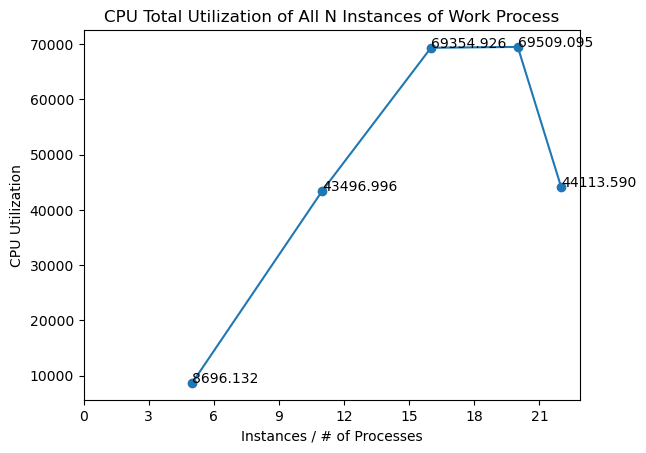

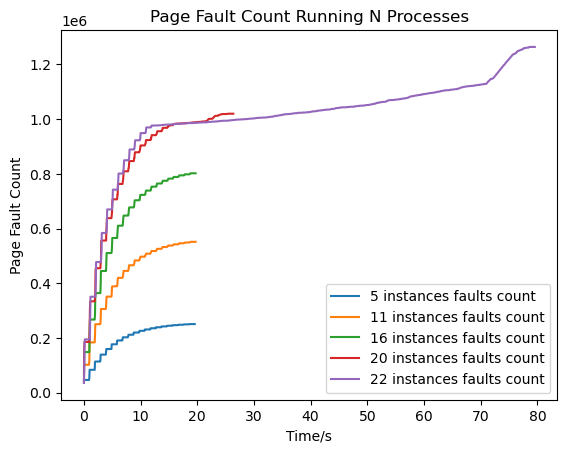

In [8]:
import matplotlib.pyplot as plt

utilization = dict()
page_fault = dict()


for i, j in [(5,3),(11,4),(16,5),(20,6),(22,7)]:
    utilization[i] = 0
    page_fault[i] = []
    jiffies = []
    sum_maj = 0
    sum_min = 0
    with open("./profile%d.data" % j) as f:
        for line in f.readlines():
            try:
                s = [int(x) for x in line.strip().split(" ")]
            except:
                break
            jiffies.append(s[0])
            utilization[i] += s[3]
            sum_maj += s[2]
            sum_min += s[1]
            page_fault[i].append(sum_maj + sum_min)
    print("Instance %d completion time: %d " % (i, jiffies[-1] - jiffies[0]))
    print("Total page faults is: major %d, minor %d" % (sum_maj, sum_min))
    utilization[i] = utilization[i]/(jiffies[-1] - jiffies[0])

# Plotting CPU Total Utilization
plt.figure()
x = [x for x in sorted(utilization)]
y = [utilization[x] for x in sorted(utilization)]
plt.plot(x, y, marker='o')
plt.title('CPU Total Utilization of All N Instances of Work Process')
plt.xlabel('Instances / # of Processes')
plt.ylabel('CPU Utilization')
plt.xticks(range(0, 23, 3))
for i, txt in enumerate(y):
    plt.annotate("%.3f" % txt, (x[i], y[i]))
plt.show()

# Plotting Page Fault Count for Each Instance
plt.figure()
for i in sorted(page_fault.keys()):
    x = [x * 0.05 for x in range(len(page_fault[i]))]
    y = page_fault[i]
    plt.plot(x, y, label="%d instances faults count" % i)
plt.title('Page Fault Count Running N Processes')
plt.xlabel('Time/s')
plt.ylabel('Page Fault Count')
plt.legend()
plt.show()
